In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image

Scaling
Rotating
Stretching
Flipping
Cropping
Brightness
Color inversion

## 1. Loading and displaying images

In [12]:
# Load the image into an array
image = Image.open('files/einstein.jpg')
image = np.array(image)

In [13]:
# Get the dimensions of the image
image.shape

(900, 675)

(-0.5, 674.5, 899.5, -0.5)

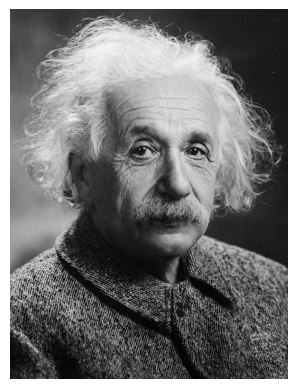

In [14]:
# Display the image
plt.imshow(image, cmap='gray')
plt.axis('off')

## 2. Introduction to interpolation

In [40]:
### 1D interpolation

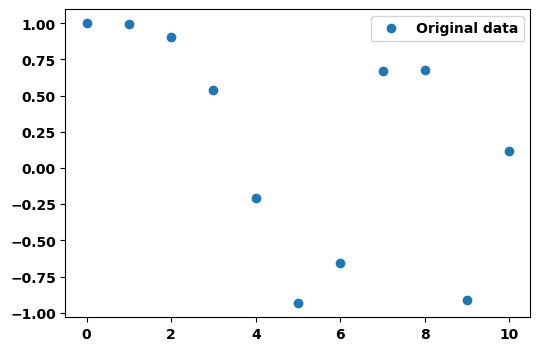

In [37]:
from scipy.interpolate import interp1d, RegularGridInterpolator

x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
plt.figure(figsize=(6, 4))
plt.plot(x, y, 'o', label='Original data')
plt.legend()

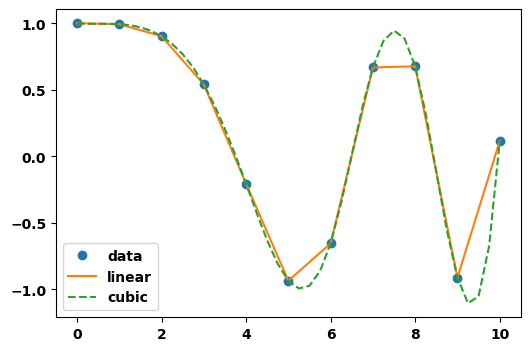

In [39]:
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

xnew = np.linspace(0, 10, num=41, endpoint=True)
plt.figure(figsize=(6,4))
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')

### 2D interpolation

Text(0.5, 1.0, 'Original Data')

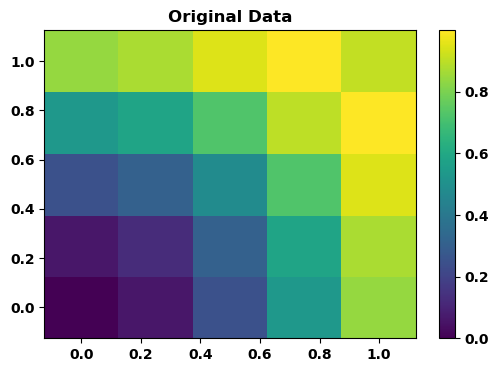

In [52]:
# Grid of x, y points
x = np.linspace(0, 1, 5)
y = np.linspace(0, 1, 5)
xx, yy = np.meshgrid(x, y)

# Function values at each point
z = np.sin(xx**2 + yy**2)

# Plot
plt.figure(figsize=(6, 4))
plt.pcolor(xx, yy, z, cmap='viridis')
plt.colorbar()
plt.title("Original Data")


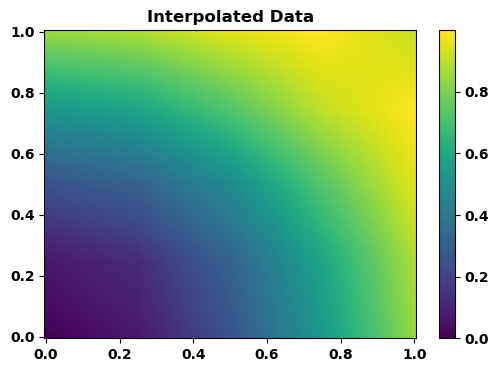

In [51]:
# Create interpolator
interpolator = RegularGridInterpolator((y, x), z)

# New grid
x_new = np.linspace(0, 1, 100)
y_new = np.linspace(0, 1, 100)
x_new, y_new = np.meshgrid(x_new, y_new)

# Interpolate
points_new = np.array([x_new.ravel(), y_new.ravel()]).T  # Points must match (y,x) ordering
z_new = interpolator(points_new).reshape(x_new.shape)

# Plot
plt.figure(figsize=(6,4))
plt.pcolor(x_new, y_new, z_new, cmap='viridis')
plt.colorbar()
plt.title("Interpolated Data")
plt.show()


## 3. Scaling an image

(45, 33)


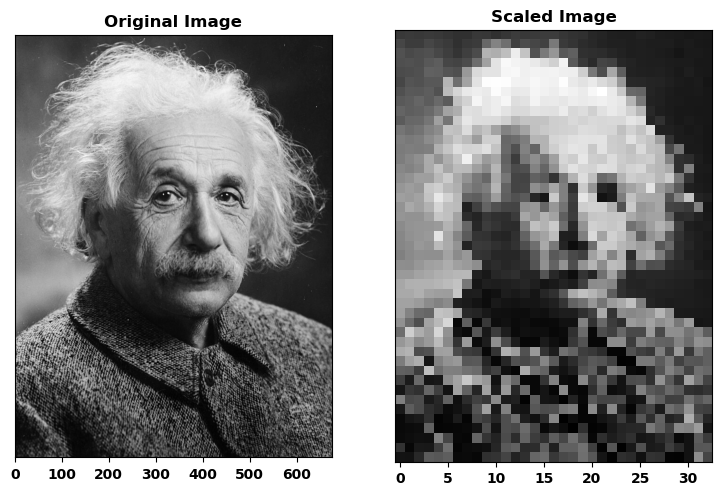

In [32]:
# Intro to interpolation
from scipy.interpolate import RegularGridInterpolator

# Get the dimensions of the image
rows, cols = image.shape

# Create a new set of dimensions
scale_factor = 0.05
new_rows, new_cols = int(rows * scale_factor), int(cols * scale_factor)

# Create a grid for interpolation
x = np.arange(cols)
y = np.arange(rows)
x_new = np.linspace(0, cols-1, new_cols)
y_new = np.linspace(0, rows-1, new_rows)
x_new, y_new = np.meshgrid(x_new, y_new)

# Create the interpolation function
interpolator = RegularGridInterpolator((y, x), image)
scaled_image = interpolator(np.array([y_new.ravel(), x_new.ravel()]).T).reshape((new_rows, new_cols))

# Get the new dimensions of the image
print(scaled_image.shape)

# Display the new image
fig,ax = plt.subplots(1,2,figsize=(9,6))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].yaxis.set_visible(False)
ax[0].xaxis.set_visible(True)

ax[1].imshow(scaled_image, cmap='gray')
ax[1].set_title('Scaled Image')
ax[1].yaxis.set_visible(False)
ax[1].xaxis.set_visible(True)

## 4. Applying linear transformations to images